In [1]:
# Chapter 6 - ex 7: TreeMap - Waffle Chart
## Part 1: TreeMap
# - Cho dữ liệu là danh sách ứng viên và số phiếu bầu trong cuộc bầu cử tổng thống Mỹ năm 2016.
# 	                                Hillary Clinton	         Donald Trump	           Others
#                Virginia	            1.981.473	            1.769.443	          233.715
#                Maryland	            1.677.928	              943.169	          160.349
#               West Virginia	          188.794	              489.371	           36.258
# - Vẽ 3 TreeMap thể hiện tỷ lệ số phiếu bầu lần lượt cho ứng viên ở Virginia, Maryland và West Virginia

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pywaffle import Waffle
import squarify
sb.set()

In [3]:
data = pd.DataFrame({'Hillary Clinton': [1981473, 1677928, 188794], 
                    'Donald Trump': [1769443, 943169, 489371], 
                    'Others': [233715, 160349, 36258]}, index= ['Virginia', 'Maryland', 'West Virginia'])
data

,Hillary Clinton,Donald Trump,Others
Virginia,1981473,1769443,233715
Maryland,1677928,943169,160349
West Virginia,188794,489371,36258


In [4]:
labels = data.transpose().reset_index()
labels['Vir'] = labels.apply(lambda x: x['index'] + '\n' + '(' + format(x[1],',') + ')', axis=1)
labels['Mar'] = labels.apply(lambda x: x['index'] + '\n' + '(' + format(x[2],',') + ')', axis=1)
labels['Wes'] = labels.apply(lambda x: x['index'] + '\n' + '(' + format(x[3],',') + ')', axis=1)
labels

,index,Virginia,Maryland,West Virginia,Vir,Mar,Wes
0,Hillary Clinton,1981473,1677928,188794,"Hillary Clinton\n(1,981,473)","Hillary Clinton\n(1,677,928)","Hillary Clinton\n(188,794)"
1,Donald Trump,1769443,943169,489371,"Donald Trump\n(1,769,443)","Donald Trump\n(943,169)","Donald Trump\n(489,371)"
2,Others,233715,160349,36258,"Others\n(233,715)","Others\n(160,349)","Others\n(36,258)"


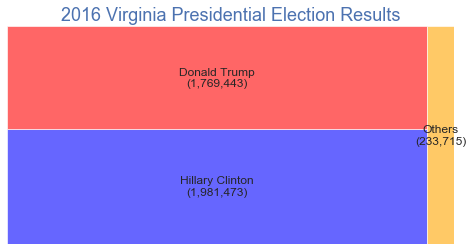

In [5]:
plt.figure(figsize=(8,4))
squarify.plot(sizes=data.loc['Virginia'].values, label=labels['Vir'].tolist(), color=['blue', 'red', 'orange'], alpha=0.6)
plt.title("2016 Virginia Presidential Election Results", fontsize=18, color = 'b')
plt.axis('off')
plt.show()

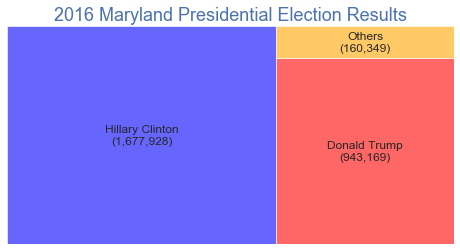

In [6]:
plt.figure(figsize=(8,4))
squarify.plot(sizes=data.loc['Maryland'].values, label=labels['Mar'].tolist(), color=['blue', 'red', 'orange'], alpha=0.6)
plt.title("2016 Maryland Presidential Election Results", fontsize=18, color = 'b')
plt.axis('off')
plt.show()

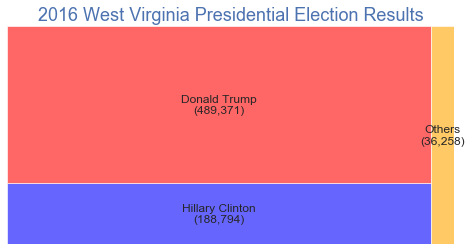

In [7]:
plt.figure(figsize=(8,4))
squarify.plot(sizes=data.loc['West Virginia'].values, label=labels['Wes'].tolist(), color=['blue', 'red', 'orange'], alpha=0.6)
plt.title("2016 West Virginia Presidential Election Results", fontsize=18, color = 'b')
plt.axis('off')
plt.show()

In [8]:
# Part 2: Waffle Chart
# •	Tính tổng số phiếu bầu của từng ứng viên ở cả 3 khu vực
# •	Vẽ Waffle Chart thể hiện tỷ lệ số phiếu bầu tổng cho từng ứng viên

In [16]:
total = data.sum().reset_index()
total.rename(columns={'index': 'name', 0: 'result'}, inplace=True)
total['waffle'] = total['result']/25000
total

,name,result,waffle
0,Hillary Clinton,3848195,153.92780
1,Donald Trump,3201983,128.07932
2,Others,430322,17.21288


Text(0.5, 1.0, '016 Presidential Election Results')

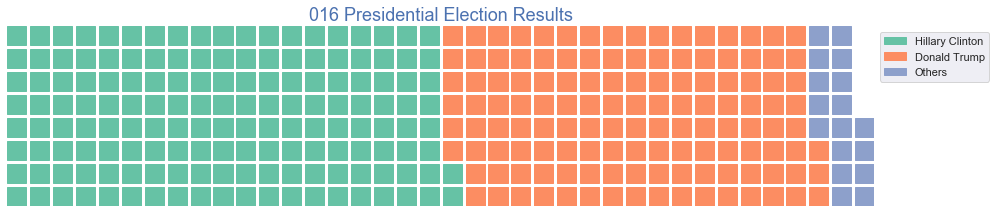

In [23]:
fig = plt.figure(FigureClass=Waffle, 
                rows=8, values=total['waffle'], 
                labels=list(total['name']), 
                figsize=(14,6), 
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)})
plt.title('016 Presidential Election Results', fontsize=18, color='b')